# [Computational Social Science] 

## 2-2 Data Splitting and Bias/Variance Tradeoff - Student Version

In this lab, we will introduce the fundamentals of machine learning. We will introduced supervised methods, bias/variance tradeoff, and data splitting.

## Supervised Machine Learning

Let's begin by introducing the concept of supervised learning. We're going to work with [Census Income dataset](https://archive.ics.uci.edu/ml/datasets/Census+Income) on the UCI Machine Learning Repository. In supervised machine learning, we start with a structured dataset where each observation is a row and each variable is a column. The goal is to use a number of features (previously you might have called these "covariates," "independent variables," or "regressors") to train a model that predicts a target (previously you might have called these "outcome variable" or "dependent variable"). In this case, we will use information like age, education, and marital status to predict each person's income-bracket.

First let's load the data. The data is stored in a ".data" format so we'll use the pandas "read_table" method.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Create a list of column names, found in "adult.names"
col_names = ['age', 'workclass', 'fnlwgt',
            'education', 'education-num',
            'marital-status', 'occupation', 
             'relationship', 'race', 
             'sex', 'capital-gain',
            'capital-loss', 'hours-per-week',
            'native-country', 'income-bracket']

# Read table from the data folder
census = pd.read_table("../../data/adult.data", sep = ',', names = col_names)

In [3]:
# Look at the first 5 rows
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Preprocessing

Before we predict income-bracket, we need to think about a few questions.

1. What features should we include?
2. What is the best model?
3. How do we evaluate the model?

First let's think about the features. Check the different data types in our dataset. What do you notice?

In [4]:
census.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income-bracket    object
dtype: object

**Answer**: 

Before we pass these features into a model, we need to convert the categorical features to numerical information. Our target is also categorical, so we will need to transform that column as well. Starting with the outcome, income-bracket, use sklearn's [LabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html) to convert the **income-bracket** column to a binary outcome (0 for "<=50k" and 1 for ">50k"). 

In [5]:
from sklearn.preprocessing import LabelBinarizer 
 
lb = LabelBinarizer()
census['income-bracket-binary'] = lb.fit_transform(census["income-bracket"]) # use fit_transform to create new variable
census.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-bracket,income-bracket-binary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1


Now let's look at the features we will use for prediction. There are a couple of different ways we could convert our categorical features to numerical ones. One simple way to do this is to convert them into dummy variables. Use the pandas [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) method to convert the categorical variables into dummy variables. *Be sure to remove the target variable (both the original and binarized versions) with* `.drop()`.

In [6]:
# create X by dropping our y variable from the df with the .drop() method. which axis refers to columns?
X = census.drop(labels = ['income-bracket', 'income-bracket-binary'], axis = 1)

# use get_dummies method to convert selected vars into dummy variables
X = pd.get_dummies(data=X, 
                   columns=["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"])
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Notice that all of our categorical variables have been converted. Instead of strings, we now either have a 0 or a 1 in their place, and new columns representing each category. Take a look at the shape and structure of this new dataframe compared to the original. What can you say about these two dataframes? Is there new information, or is it presented differently? 

In [7]:
print("Dimensions of Dummy Dataframe are", X.shape)
print("Dimensions of the Original Dataframe are", census.shape)

Dimensions of Dummy Dataframe are (32561, 108)
Dimensions of the Original Dataframe are (32561, 16)


**Your Answer**: 

### Curse of Dimensionality and Sparsity

This data preprocessing reveals two important concepts in machine learning. Namely, [**the curse of dimensionality** and **sparsity**](https://www.kaggle.com/residentmario/curse-of-dimensionality). A sparse matrix is one filled mainly with 0s, as we see above. In geometric terms, this property means that most combinations of features are totally empty. The curse of dimensionality refers to the idea that as the number of features grow, the number of observations needed to properly model predictions grows as well. The problem is that that number of observations required grows much faster than the number of features. Trading off between increasing features to improve model performance, but reducing the number of features to avoid the instability and overfitting that occurs with too few observations, is at the heart of supervised machine learning. In the coming weeks, we will learn more about how to conceptualize and make these tradeoffs.

## Data Splitting

Another key aspect of machine learning is splitting our data. In your previous statistics classes, you likely fit regression models on an entire dataset. The problem with fitting a model this way is that models will tend to perform better on the data that they are trained on, but then perform less well on out of sample data. The error in a machine learning model comes from two sources:

**Bias**: Error arising from the difference between the predicted output and the actual output. High bias models tend to be too simple and **underfit** the dataset.

**Variance**: Error arising from modeling the noise in the output. High variance models tend to be too complex and **overfit** the dataset.

The [**bias-variance tradeoff**](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) is a fundamental concept in machine learning. The less bias in a model, the higher the variance and vice versa. [Underfitting or overfitting](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html) a model makes generalizing to new data difficult. Trading off between these two sources of error is an essential part of machine learning. Over the next few weeks, we will explore how to deal with bias-variance tradeoff in the modeling process. Today, we'll look at how our choices in the data splitting step affect bias-variance tradeoff as well.

### Train/Test/Validation Split

In general, machine learning models will tend to overfit the data they are trained on. As a machine learning model becomes more complex, it learns many of the idiosyncrasies in a dataset, but this tendency will mean it generalizes poorly. To assess the extent a model is prone to this problem, and make corrections, we always split our data before training our models.

The general procedure for this is the following:
1. Randomly divide our data set into two smaller sets: one for training and one for testing
2. Train the data on the training set, changing our model along the way to increase accuracy
3. Test the data's predictions using in test set.

Scikit-learn's [test_train_split function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) will help here. First, separate your data into two parts: a dataframe containing the features used to make our prediction, and an array of the true targets. We already made a dataframe with our features earlier when we created dummy variables, so now we need to make a target vector.

In [8]:
y = census['income-bracket-binary']

Now, set a random seed to ensure that we all get the same results when we sample. Then, use train_test_split to create a training set that contains 80% of the original dataset and a test set with 20% of the original data. Then check the shapes of each of the new sets.

In [9]:
from sklearn.model_selection import train_test_split

# set the random seed
np.random.seed(10)

In [10]:
# split the data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [11]:
print("Shape of X train is", X_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_test is", X_test.shape)
print("Shape of y_test is", y_test.shape)

Shape of X train is (26048, 108)
Shape of y_train is (26048,)
Shape of X_test is (6513, 108)
Shape of y_test is (6513,)


### Validation Set

Because we may want to adjust our models, it is generally a good idea to save the test set until the very end and only use it once. Instead of going back and forth between the training and test set, we should instead use a validation set. Try using the train_test_split method to further split your training data so that 75% remains in training and 25% is reserved for validation. Note that this will mean the final split is 60% train, 20% validation, and 20% test. Check the dimensions of each.

In [12]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                    train_size=0.75, test_size=0.25)

In [13]:
print("Shape of X train is", X_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_validate is", X_validate.shape)
print("Shape of y_validate is", y_validate.shape)

Shape of X train is (19536, 108)
Shape of y_train is (19536,)
Shape of X_validate is (6512, 108)
Shape of y_validate is (6512,)


## Fit a Model

Now let's try to fit a model. We'll use a logistic regression and how accurate our model is in the validation set. We'll explore fitting multiple models and adjusting them in coming weeks, but for now we'll start with one that you're familiar with. See the documentation for [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to see how to train a model and predict on new data. Make sure you train the model on your train set, and predict on the validation set.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [15]:
# create a model
log_reg = LogisticRegression()

# fit the model
log_model = log_reg.fit(X_train, y_train)

y_pred = log_model.predict(X_validate)

Now let's visualize how we did. A common tool to see how a supervised machine algorithm performed in a classification setting is the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). Each cell in the confusion matrix shows the relationship between the true observations on the y-axis and the predicted observations on the x-axis. Cells along the diagonal are instances where the predictions match the true labels.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

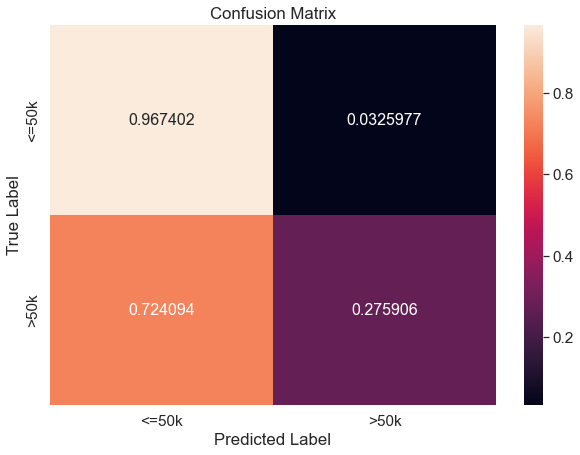

In [20]:
cf_matrix = confusion_matrix(y_validate, y_pred, normalize = 'true')

# Seaborn Plot for Confusion Matrix

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "<=50k", 1: ">50k"})
df_cm.index = ["<=50k", ">50k"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Loop

**Exercise**: Using the [iris](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) dataset, write a for loop that varies the training set size and visualize how performance changes as you increase the training size. What tends to happens? As a bonus, you can also use the census dataset that we've been working with so far, but it may take a while to run.

In [21]:
# first load in and assess the df 
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris.data[:, 0:2]  # Let's use the first two features
y_iris = iris.target

iris.data.shape

(150, 4)

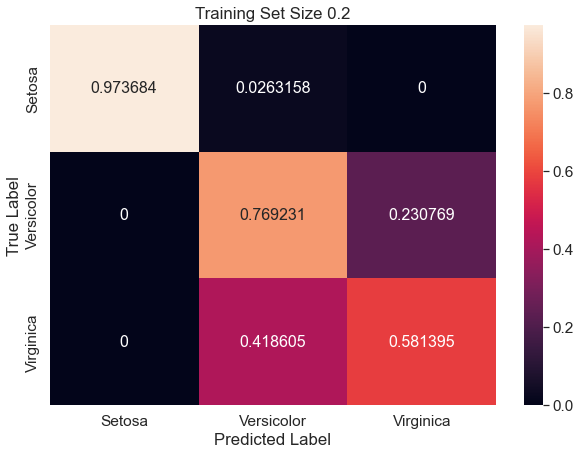

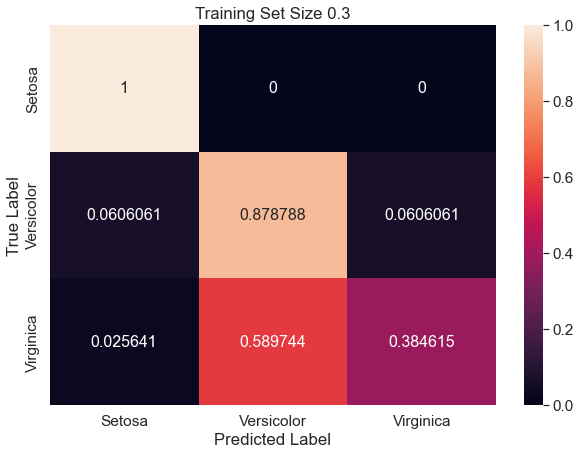

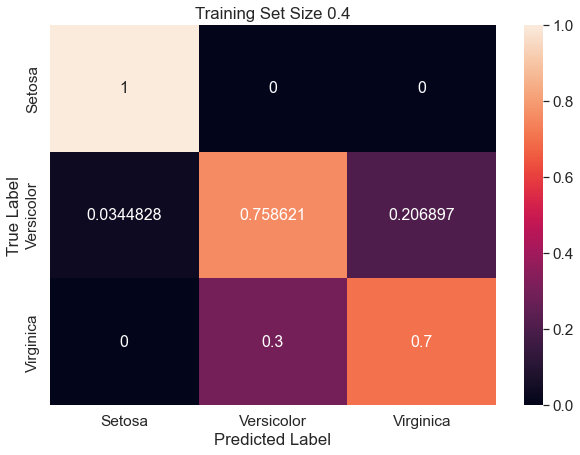

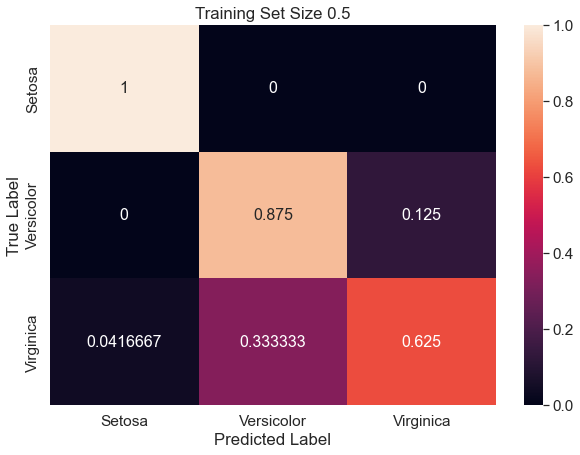

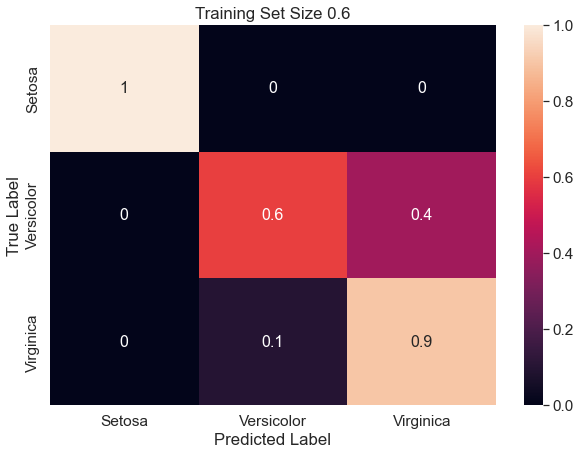

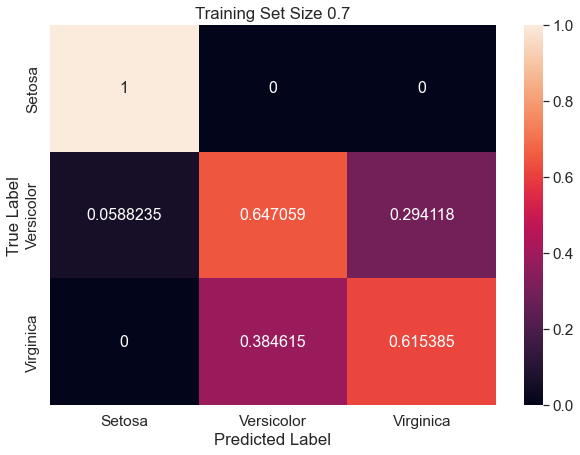

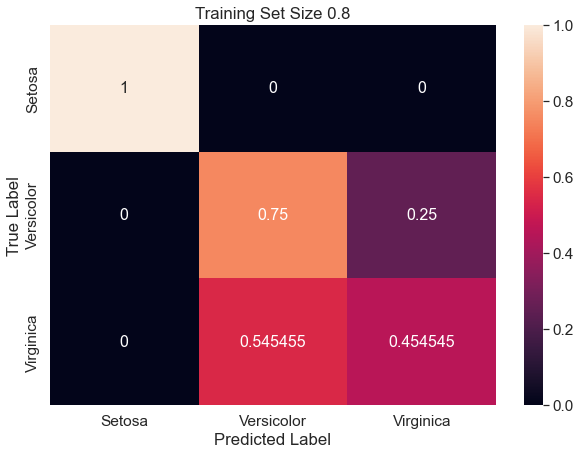

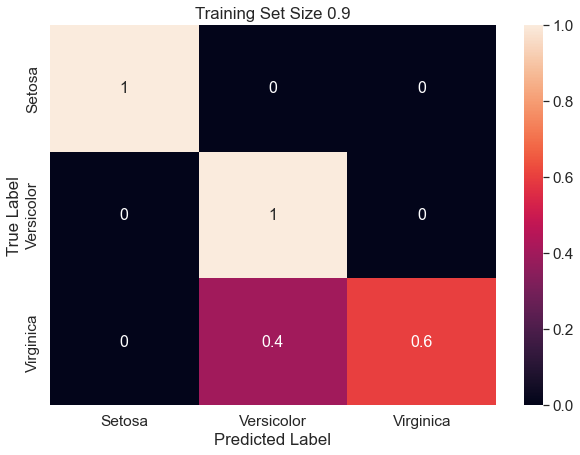

In [30]:
sizes = np.arange(.2, 1, .10)

for size in sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, train_size = size)

    # Initialize model
    log_reg = LogisticRegression()
    
    # fit the model
    log_model = log_reg.fit(X_train, y_train)

    y_pred = log_model.predict(X_test)

    cf_matrix = confusion_matrix(y_test, y_pred,  normalize = "true")
    
    df_cm = pd.DataFrame(cf_matrix, range(3), range(3))

    # rename and index...can find the key to this data set using the target and target_names attributes
    df_cm = df_cm.rename(index=str, 
                         columns={0: "Setosa", 1: "Versicolor", 2: "Virginica"})
    df_cm.index = ["Setosa", "Versicolor", "Virginica"]
    
    plt.figure(figsize = (10,7))
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, 
               annot=True,
               annot_kws={"size": 16},
               fmt='g')

    plt.title("Training Set Size " + str(round(size, 1)))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

**Answer**: 

## Cross-Validation

As you can see, choosing the optimal train/validation/test split can be difficult. It is also prone to high variance problems as the machine learning algorithm's performance will be very dependent on the composition of the randomly sampled test split. This problem is exacerbated in small datasets especially. One way to address this problem is with [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#:~:text=Cross%2Dvalidation%2C%20sometimes%20called%20rotation,to%20an%20independent%20data%20set).

The general procedure is:

1. Randomly split the data into k-folds
2. Build the model on k-1 folds, then test on the last fold
3. Record prediction error
4. Cycle until each fold has served as the test set
5. The average of the errors is the cv-error

Cross-validation has the advantage of allowing every data point to be in the test set once. By averaging the errors, the model is less sensitive to variation in the random samples, and is less prone to overfitting. Let's try with our logistic regression again, using the [cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) method.

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

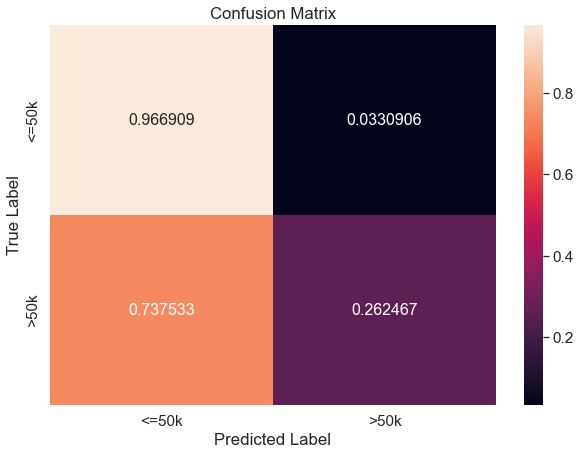

In [34]:
X = census.drop(['income-bracket', 'income-bracket-binary'], axis = 1)
X = pd.get_dummies(X)

y = census['income-bracket-binary']

log_pred = cross_val_predict(log_reg, X, y, cv = 3)

cf_matrix = confusion_matrix(y, log_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
              range(2))

df_cm = df_cm.rename(index=str, columns={0: "<=50k", 1: ">50k"})
df_cm.index = ["<=50k", ">50k"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

---
Authored by Aniket Kesari